In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data.csv')
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
work = df.iloc[0:450,:]
work.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
445,B,11.99,24.89,77.61,441.3,0.10300,0.09218,0.05441,0.04274,0.1820,...,12.98,30.36,84.48,513.9,0.1311,0.1822,0.1609,0.12020,0.2599,0.08251
446,M,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,...,21.53,38.54,145.40,1437.0,0.1401,0.3762,0.6399,0.19700,0.2972,0.09075
447,B,14.80,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,...,16.43,22.74,105.90,829.5,0.1226,0.1881,0.2060,0.08308,0.3600,0.07285
448,B,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463
449,M,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,...,25.68,32.07,168.20,2022.0,0.1368,0.3101,0.4399,0.22800,0.2268,0.07425


In [4]:
unseen = df.iloc[450:,:]
unseen.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
450,B,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952
451,M,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,...,21.44,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091
452,B,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,13.09,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194
453,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,15.80,16.93,103.10,749.9,0.13470,0.1478,0.1373,0.10690,0.2606,0.07810
454,B,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,...,14.34,22.15,91.62,633.5,0.12250,0.1517,0.1887,0.09851,0.3270,0.07330


In [5]:
print(work.shape)
print(unseen.shape)

(450, 31)
(119, 31)


In [6]:
X = work.drop(["diagnosis"], axis=1)
X = X.values

In [7]:
y = work['diagnosis']
y.head(1)

0    M
Name: diagnosis, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
le_Y=LabelEncoder()
y=le_Y.fit_transform(y)
print(y[:5])
print(y.shape)

[1 1 1 1 1]
(450,)


1 - M <br/>
0 - B

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 30)
(90, 30)
(360,)
(90,)


In [10]:
x_train = torch.from_numpy(x_train)
x_test  = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [11]:
from torch.utils.data import DataLoader , TensorDataset
train_ds = TensorDataset(x_train, y_train)

In [12]:
test_ds = TensorDataset(x_test, y_test)

In [13]:
# Define data loader for train set
batch_size = 30
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [14]:
#Define data loader for test set
batch_size = 30
test_dl = DataLoader(test_ds, batch_size, shuffle=False)

In [15]:
Net1 = nn.Sequential(
        nn.Linear(30, 15),
        nn.ReLU(),
        nn.Linear(15, 15),
        nn.Sigmoid(),
        nn.Linear(15,7),
        nn.ReLU(),
        nn.Linear(7,2),
        )

In [16]:
optimizer = torch.optim.Adam(Net1.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [17]:
val_acc=[]
loss_list=[]
train_acc =[]
for epoch in range(30):
    loss_sublist = []
    corr = 0
    for x, y in train_dl:
        Net1.train()
        optimizer.zero_grad()
        preds = Net1(x.float())
        loss = criterion(preds, y.long())
        loss_sublist.append(loss.data.item())
        loss.backward()
        optimizer.step()
       
        _, yhat = torch.max(preds.data, 1)
        corr += (yhat == y).sum().item()
        
    
    loss_list.append(np.mean(loss_sublist))
    acc = corr/len(train_ds)
    print("Training Accuracy at epoch",epoch+1,"is: ",acc)
    train_acc.append(acc)
    
     
    correct=0
    with torch.no_grad():
        for x_test, y_test in test_dl:
            Net1.eval()
            z = Net1(x_test.float())
            _, yhat1 = torch.max(z.data, 1)
            correct += (yhat1 == y_test).sum().item()
    accuracy = correct / len(test_ds)
    print("Validation Accuracy at epoch",epoch+1,"is: ",accuracy)
    val_acc.append(accuracy) 

Training Accuracy at epoch 1 is:  0.5861111111111111
Validation Accuracy at epoch 1 is:  0.6
Training Accuracy at epoch 2 is:  0.5861111111111111
Validation Accuracy at epoch 2 is:  0.6
Training Accuracy at epoch 3 is:  0.5861111111111111
Validation Accuracy at epoch 3 is:  0.6
Training Accuracy at epoch 4 is:  0.5861111111111111
Validation Accuracy at epoch 4 is:  0.6
Training Accuracy at epoch 5 is:  0.5861111111111111
Validation Accuracy at epoch 5 is:  0.6
Training Accuracy at epoch 6 is:  0.5861111111111111
Validation Accuracy at epoch 6 is:  0.6
Training Accuracy at epoch 7 is:  0.5861111111111111
Validation Accuracy at epoch 7 is:  0.6
Training Accuracy at epoch 8 is:  0.5861111111111111
Validation Accuracy at epoch 8 is:  0.6
Training Accuracy at epoch 9 is:  0.5861111111111111
Validation Accuracy at epoch 9 is:  0.6
Training Accuracy at epoch 10 is:  0.5861111111111111
Validation Accuracy at epoch 10 is:  0.6
Training Accuracy at epoch 11 is:  0.5861111111111111
Validation Acc

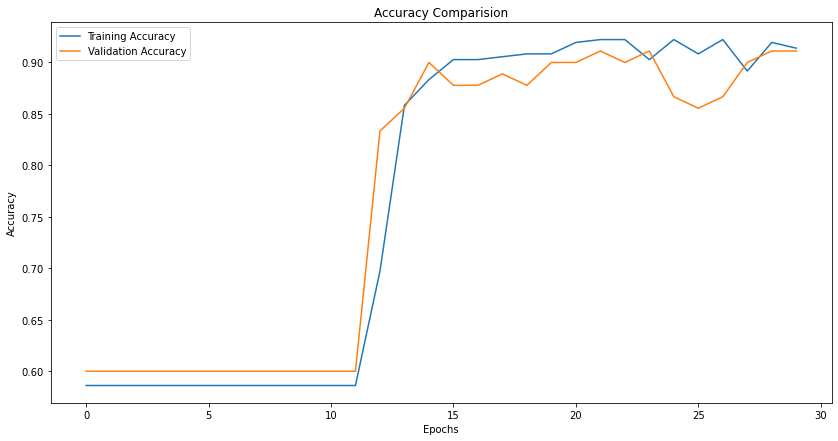

In [18]:
plt.figure(figsize=(14,7))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Comparision')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

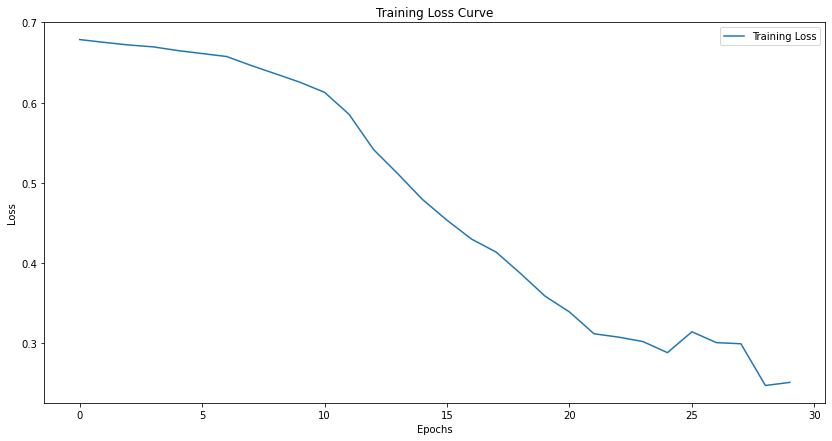

In [19]:
plt.figure(figsize=(14,7))
plt.plot(loss_list,label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Lets test model accuracy on unseen data that model neither seen in training phase nor in validation phase.

In [20]:
xr_test = unseen.drop('diagnosis',axis=1)
xr_test = xr_test.values
xr_test[:3]

array([[1.187e+01, 2.154e+01, 7.683e+01, 4.320e+02, 6.613e-02, 1.064e-01,
        8.777e-02, 2.386e-02, 1.349e-01, 6.612e-02, 2.560e-01, 1.554e+00,
        1.955e+00, 2.024e+01, 6.854e-03, 6.063e-02, 6.663e-02, 1.553e-02,
        2.354e-02, 8.925e-03, 1.279e+01, 2.818e+01, 8.351e+01, 5.072e+02,
        9.457e-02, 3.399e-01, 3.218e-01, 8.750e-02, 2.305e-01, 9.952e-02],
       [1.959e+01, 2.500e+01, 1.277e+02, 1.191e+03, 1.032e-01, 9.871e-02,
        1.655e-01, 9.063e-02, 1.663e-01, 5.391e-02, 4.674e-01, 1.375e+00,
        2.916e+00, 5.618e+01, 1.190e-02, 1.929e-02, 4.907e-02, 1.499e-02,
        1.641e-02, 1.807e-03, 2.144e+01, 3.096e+01, 1.398e+02, 1.421e+03,
        1.528e-01, 1.845e-01, 3.977e-01, 1.466e-01, 2.293e-01, 6.091e-02],
       [1.200e+01, 2.823e+01, 7.677e+01, 4.425e+02, 8.437e-02, 6.450e-02,
        4.055e-02, 1.945e-02, 1.615e-01, 6.104e-02, 1.912e-01, 1.705e+00,
        1.516e+00, 1.386e+01, 7.334e-03, 2.589e-02, 2.941e-02, 9.166e-03,
        1.745e-02, 4.302e-03, 1.309e

In [21]:
yr_test = unseen['diagnosis']
yr_test.head()

450    B
451    M
452    B
453    B
454    B
Name: diagnosis, dtype: object

In [22]:
Y=LabelEncoder()
yr_test=Y.fit_transform(yr_test)
print(yr_test[:5])
print(yr_test.shape)

[0 1 0 0 0]
(119,)


In [23]:
xr_test  = torch.from_numpy(xr_test)
yr_test = torch.from_numpy(yr_test)

In [24]:
y_p = Net1(xr_test.float())
_, yhat1 = torch.max(y_p.data, 1)

In [25]:
yhat1

tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [26]:
y_pred1 = yhat1.detach().numpy()

In [27]:
from sklearn.metrics import accuracy_score 
print("Accuracy of on test data Model:  ", accuracy_score(yr_test, y_pred1) *  100)

Accuracy of on test data Model:   91.59663865546219


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yr_test, y_pred1)
cm

array([[86,  6],
       [ 4, 23]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
print("Classification report of model: ")
print(classification_report(yr_test, y_pred1))

Classification report of model: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        92
           1       0.79      0.85      0.82        27

    accuracy                           0.92       119
   macro avg       0.87      0.89      0.88       119
weighted avg       0.92      0.92      0.92       119



In [30]:
y_pred1

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [31]:
yr_test

tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       dtype=torch.int32)